## Load Stuff

In [ ]:
import torch
from mario_gpt import MarioDataset, MarioLM, TrainingConfig, MarioGPTTrainer
from mario_gpt.utils import view_level, convert_level_to_png, join_list_of_list, characterize
from mario_gpt.flower_level import FLOWER_LEVEL

dataset = MarioDataset(mario_lm.tokenizer, level_string=FLOWER_LEVEL) # for token conversion

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output

In [156]:
#---
# load model and generate flowers
#---
n_cols = 48

mario_lm = MarioLM(lm_path="../FlowerGPT", tokenizer_path="../FlowerGPT")
dataset = MarioDataset(mario_lm.tokenizer, level_string=FLOWER_LEVEL)
prompts = [" "]
generated_level = mario_lm.sample(
    prompts=prompts,
    num_steps=(14*n_cols),
    temperature=1.0,
    use_tqdm=True
)
clear_output()

In [157]:
import numpy as np

def token_to_rgb(token_array, token_dict, colors=None):
    # Create a reverse dictionary mapping token values to keys
    reverse_token_dict = {int(v.item()): k for k, v in token_dict.items()}

    # Use ascending integers as colors if not provided
    if colors is None:
        colors = list(range(len(token_dict)))

    # Create a dictionary mapping token values to colors
    color_dict = {token_value: color for token_value, color in zip(reverse_token_dict.keys(), colors)}

    # Function to map token values to colors or np.nan if not in token_dict
    def map_to_color(token_value):
        return color_dict.get(token_value, np.nan)

    # Create a 2D array of colors based on the token_array and color_dict using nested list comprehension
    rgb_array = np.array([[map_to_color(token_value) for token_value in row] for row in token_array])

    return rgb_array

# Example usage
token_array = np.array([[33, 34], [35, 36], [37, 38]])
token_dict = dataset.token_dict

rgb_array = token_to_rgb(token_array, token_dict)
print(rgb_array)


[[ 0.  1.]
 [ 2.  3.]
 [nan nan]]


In [158]:
def token_to_rgb(token_array, token_dict, colors=None):
    # Create a reverse dictionary mapping token values to keys
    reverse_token_dict = {int(v.item()): k for k, v in token_dict.items()}

    # Use ascending integers as colors if not provided
    if colors is None:
        colors = [
            [0, 170, 0],       
            [185, 122, 87],      
            [255, 242, 0],     
            [191, 232, 242],   
        ]        

    # Create a dictionary mapping token values to colors
    color_dict = {token_value: color for token_value, color in zip(reverse_token_dict.keys(), colors)}

    # Function to map token values to colors or red if not in token_dict
    def map_to_color(token_value):
        return color_dict.get(token_value, [255, 0, 0])

    # Create a 3D array of RGB colors based on the token_array and color_dict using nested list comprehension
    rgb_array = np.array([[[map_to_color(token_value) for token_value in row] for row in token_array]])

    return rgb_array

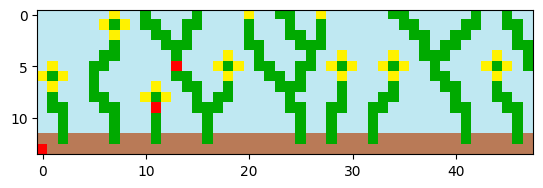

In [159]:
# Show Flowers

A = generated_level.level_tensor
rot_img = np.rot90(A.reshape(n_cols,14))
image = token_to_rgb(rot_img, dataset.token_dict)
plt.imshow(image[0])